# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:    
    data = pd.read_csv('D:/Данные/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)
display(data.head(15))
print(data.info())
print()
display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
display(data['parks_around3000'].isna())

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695     True
23696     True
23697    False
23698     True
Name: parks_around3000, Length: 23699, dtype: bool

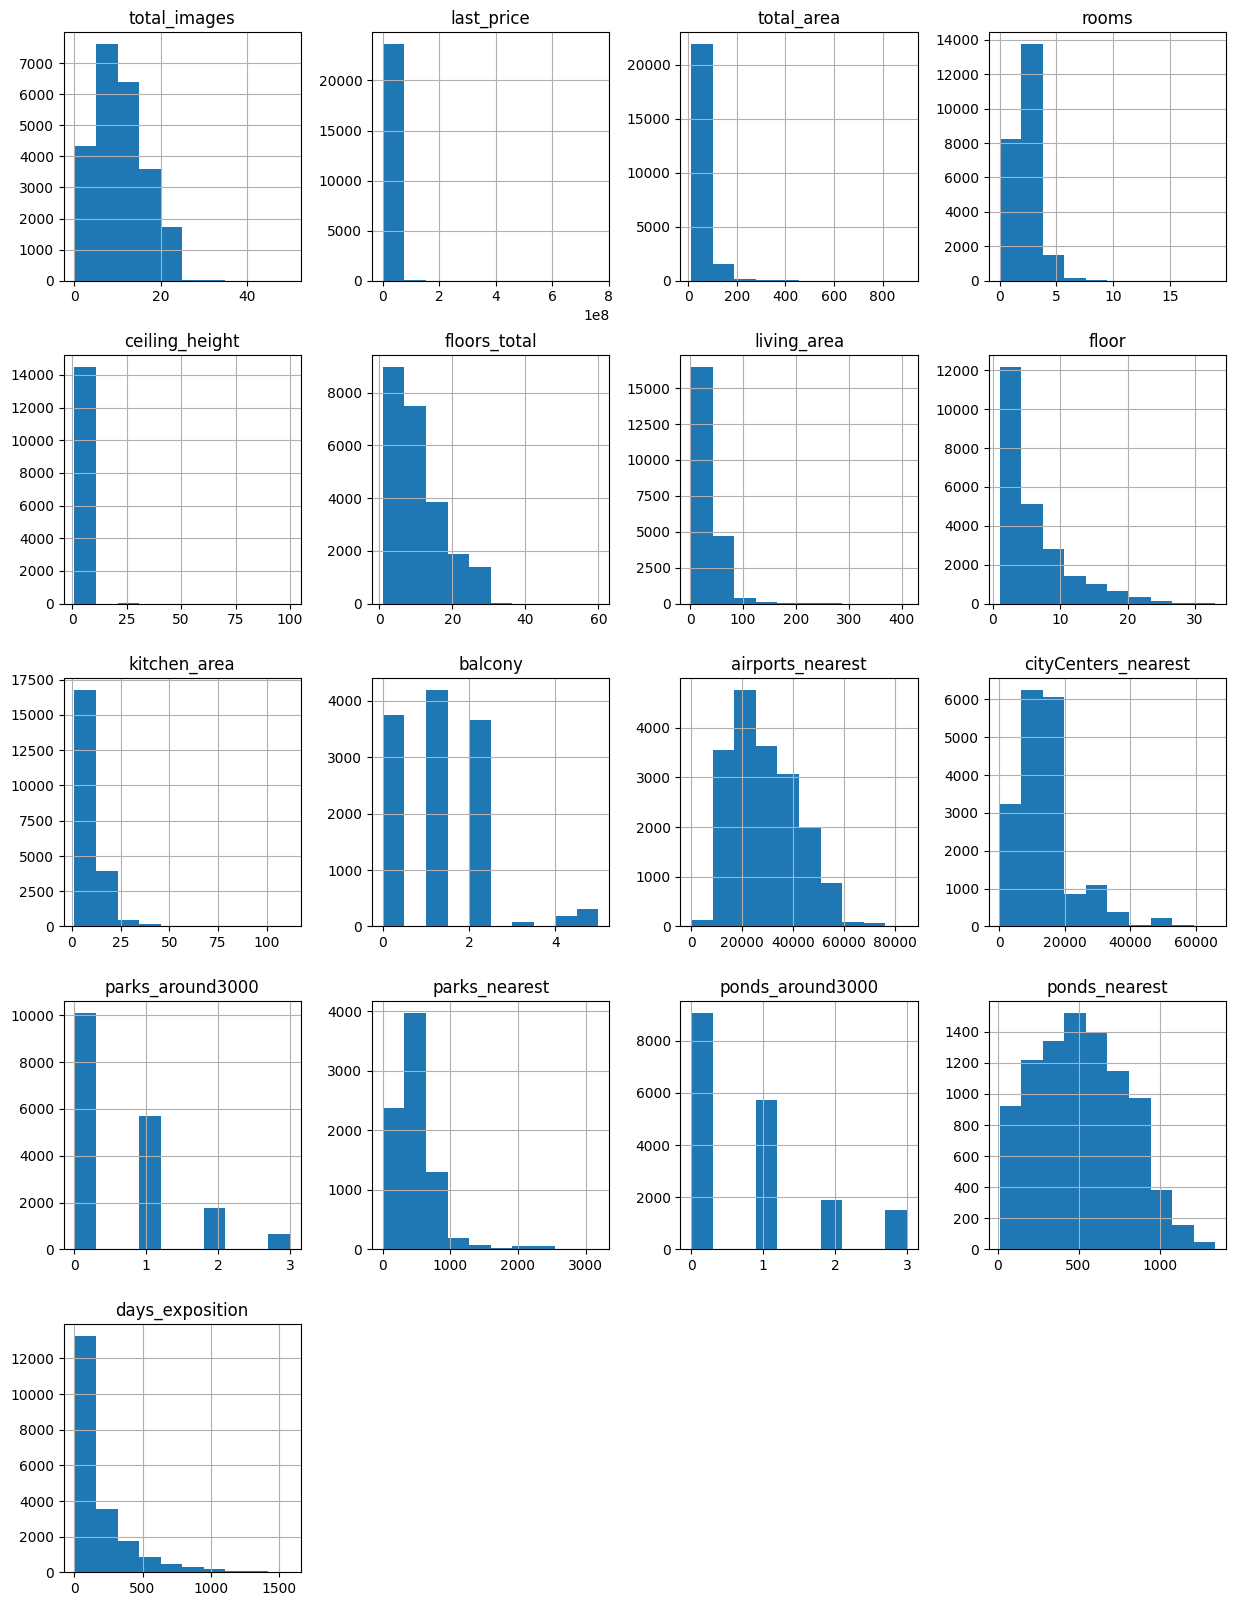

In [4]:
data.hist(figsize=(15, 20));

### Выполните предобработку данных

#### Обработка пропущенных значений:

In [5]:
# Определить кол-во пропусков по столбцам
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


***Обработка пропусков в столбцах: 
floors_total, 
locality_name, 
is_apartment, 
balcony***

In [6]:
#строк с пропусками в столбцах floors_total и locality_name менее 1 % от общего кол-ва строк, поэтому их можно удалить
data = data.dropna(subset=['floors_total', 'locality_name'])

#проверка, какими значениями заполнены столбцы
print(data['is_apartment'].value_counts())
print()
print(data['balcony'].value_counts())

#предположим, что если в ячейке не заполнено, является ли жилье апартаментами, означает, что оно ими не является, поэтому
#заменяю пропущенные значения на False
data['is_apartment'] = data['is_apartment'].fillna(False)

#аналогично с кол-вом балконов, если нет данных - предполагаем, что балкона нет, и заменяю пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(0.0).astype('float64')

False    2710
True       50
Name: is_apartment, dtype: int64

1.0    4187
0.0    3680
2.0    3656
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64


***Обработка пропусков в столбце ceiling_height***

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.6,9.0,40.0,8,False,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

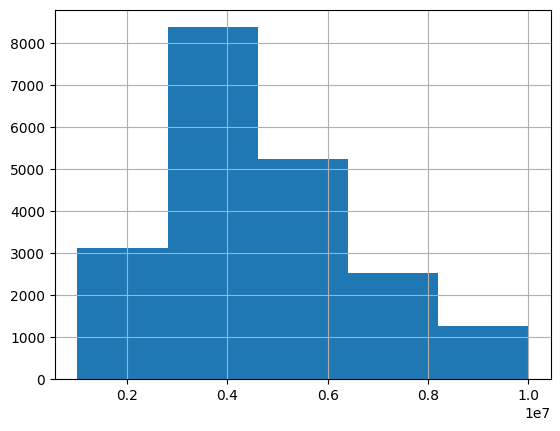

In [7]:
# Предположить высоту потолков можно в зависимости от стоимости last_price и кол-ва этажей в доме floors_total 
#(низкая этажность характерна для старой застройки и наоборот)
# Исходить только из стоимости считаю недостаточным, т.к. высокая стоимость может быть обусловлена близостью к историческому центру города

# большинство объектов имеют стоимость в дипазоне от 1 до 10 млн.
display(data[(data['last_price'] < 10000000) & (data['last_price'] > 1000000)]  )

data[(data['last_price'] < 10000000) & (data['last_price'] > 1000000)]['last_price'].hist(bins=5)
# на гистограмме видим пик от 2,4 млн, распределяем объекты на группы в зависимости от стоимости:
# 1 - < 2.4  млн.
# 2 - >=2.4 млн. и <10 млн.
# 3 - >=10млн.

<AxesSubplot:>

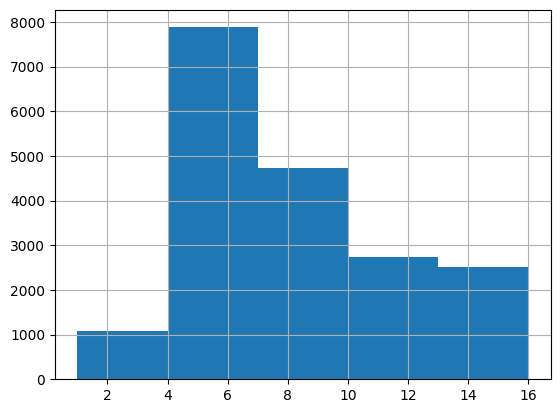

In [8]:
data[data['floors_total'] < 17]['floors_total'].hist(bins=5)
# на гистограмме видим пик в 4-7 этажей, распределяем объекты на группы в зависимости от этажности:
# 1 - <= 7
# 2 - >7

In [9]:
#добавить в датафрейм новый столбец group_floor_price:

def group_new(row):
    if row['last_price'] < 2400000 and  row['floors_total'] <= 7 :
        return  1
    elif row['last_price'] < 2400000 :
        return  2
    elif 2400000 <= row['last_price'] < 10000000 and  row['floors_total'] <= 7 :
        return  3
    elif 2400000 <= row['last_price'] < 10000000 :
        return  4
    elif row['last_price'] >= 10000000 and  row['floors_total'] <= 7 :
        return  5
    elif row['last_price'] >= 10000000 :
        return  6
    
    
data['group_floor_price'] = data.apply(group_new, axis=1)

#Проверяем, что группа присвоилась корректно
display(data.head(10))
print(data['group_floor_price'].value_counts())

#Видим, что группа 2 имеет удельный вес всего 1%, объединим ее с группой 1:

def group_new(row):
    if row['last_price'] < 2400000 :
        return  1
    elif 2400000 <= row['last_price'] < 10000000 and  row['floors_total'] <= 7 :
        return  2
    elif 2400000 <= row['last_price'] < 10000000 :
        return  3
    elif row['last_price'] >= 10000000 and  row['floors_total'] <= 7 :
        return  4
    elif row['last_price'] >= 10000000 :
        return  5
    
    
data['group_floor_price'] = data.apply(group_new, axis=1)

#Еще раз проверяем:
display(data.head(10))
print(data['group_floor_price'].value_counts())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,6
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,4
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,6
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,6
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,4
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,4
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,4
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,4
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,4


4    12277
3     6428
1     1764
6     1411
5     1348
2      337
Name: group_floor_price, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,5
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,5
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,5
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,3
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,3
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,3
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,3
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,3


3    12277
2     6428
1     2101
5     1411
4     1348
Name: group_floor_price, dtype: int64


2.52
2.6
2.6
3.165
2.8


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,5
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,5
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,5
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,3
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,3
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,3
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,3
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,3


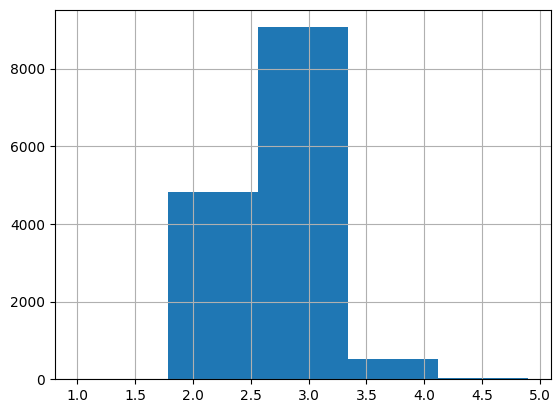

In [10]:
#Вычисляем медиану для каждой группы

data[data['ceiling_height'] < 5]['ceiling_height'].hist(bins=5)
print(data[data['group_floor_price'] == 1]['ceiling_height'].median())
print(data[data['group_floor_price'] == 2]['ceiling_height'].median())
print(data[data['group_floor_price'] == 3]['ceiling_height'].median())
print(data[data['group_floor_price'] == 4]['ceiling_height'].median())
print(data[data['group_floor_price'] == 5]['ceiling_height'].median())

display(data.head(20))

#Заполняем пропуски медианным значением группы:

for n in data['group_floor_price'].unique():
    data.loc[(data['group_floor_price'] == n) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['group_floor_price'] == n), 'ceiling_height'].median()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,5
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.80,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,5
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,5
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,3
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,3
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.60,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,3
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,3
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,3


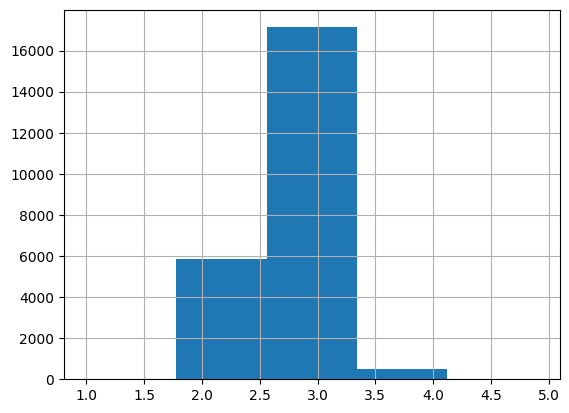

In [11]:
#проверка
data[data['ceiling_height'] < 5]['ceiling_height'].hist(bins=5)
display(data.head(20))

***Обработка пропусков в столбцах living_area и kitchen_area***

<AxesSubplot:>

Series([], Name: kitchen_area, dtype: int64)

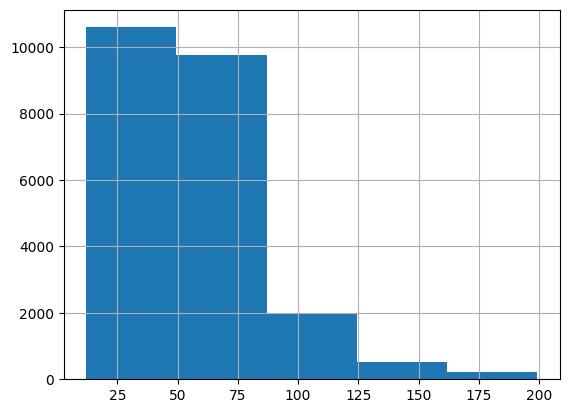

In [12]:
#Площадь большинства квартир менее 200 м2, построим гистрограмму распределения общей площади:

display(data.query('open_plan == False & is_apartment == False & studio == False & total_area < 200')['total_area'].hist(bins=5))

#Выделяем группы в зависимости от общей площади:
# 1 - <=30 м2
# 2 - >30 м2 <50 м2
# 3 - >=50 <87 м2
# 4 - >=87 <120 м2
# 5 - >=120 м2

# и подгруппы: студия, апартаменты, открытая панировка, другие

#во всех студиях нет кухни, поэтому пропуски в kitchen_area не заполняю:
display(data[data['studio'] == True]['kitchen_area'].value_counts())

In [13]:
#добавить в датафрейм новый столбец house_type_area:

def group_new(row):
    if row['total_area'] <= 30 and  row['is_apartment']  == True :
        return  'apart_1'
    elif 30 < row['total_area'] < 50 and  row['is_apartment']  == True :
        return  'apart_2'
    elif 50 <= row['total_area'] < 87 and  row['is_apartment']  == True :
        return  'apart_3'
    elif 87 <= row['total_area'] < 120 and  row['is_apartment']  == True :
        return  'apart_4'
    elif row['is_apartment']  == True :
        return  'apart_5'
    
    elif row['total_area'] <= 30 and  row['studio']  == True :
        return  'studio_1'
    elif 30 < row['total_area'] < 50 and  row['studio']  == True :
        return  'studio_2'
    elif 50 <= row['total_area'] < 87 and  row['studio']  == True :
        return  'studio_3'
    #elif 87 <= row['total_area'] < 120 and  row['studio']  == True :
    #    return  'studio_4'
    elif row['studio']  == True :
        return  'studio_5'
    
    elif row['total_area'] <= 30 and  row['open_plan']  == True :
        return  'open_plan_1'
    elif 30 < row['total_area'] < 50 and  row['open_plan']  == True :
        return  'open_plan_2'
    elif 50 <= row['total_area'] < 87 and  row['open_plan']  == True :
        return  'open_plan_3'
    #elif 87 <= row['total_area'] < 120 and  row['open_plan']  == True :
    #    return  'open_plan_4'
    elif row['open_plan']  == True :
        return  'open_plan_5'
    
    elif row['total_area'] <= 30 and  row['open_plan']  == False and  \
    row['studio']  == False and  row['is_apartment']  == False :
        return  'other_1'
    elif 30 < row['total_area'] < 50 and  row['open_plan']  == False and  \
    row['studio']  == False and  row['is_apartment']  == False :
        return  'other_2'
    elif 50 <= row['total_area'] < 87 and  row['open_plan']  == False and  \
    row['studio']  == False and  row['is_apartment']  == False :
        return  'other_3'
    elif 87 <= row['total_area'] < 120 and  row['open_plan']  == False and  \
    row['studio']  == False and  row['is_apartment']  == False :
        return  'other_4'
    elif row['open_plan']  == False and  \
    row['studio']  == False and  row['is_apartment']  == False :
        return  'other_5'
    
           
data['house_type_area'] = data.apply(group_new, axis=1)

#Проверяем, что группа присвоилась корректно
display(data.head(10))
display(data[data['studio'] == True].head(10))

print(data['house_type_area'].value_counts().sum())

#добавляем новые столбцы в датафрейм: соотношение жилой/кухонной площадей к общей площади квартиры
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']


#проверяем расчетное значение медианы соотношения площадей по группам

for n in data['house_type_area'].sort_values().unique():
    try:
        print(n, data.loc[(data['house_type_area'] == n), 'living_area_ratio'].median())
        print()
    except:
        print(f'{n} Не удалось подсчитать')
        
for n in data['house_type_area'].sort_values().unique():
    try:
        print(n, data.loc[(data['house_type_area'] == n), 'kitchen_area_ratio'].median())
        print()
    except:
        print(f'{n} Не удалось подсчитать')        
        
# 1. т.к. в группах 5 студии и открытой планировки не удалось посчитать медиану для living_area_ratio, перепишем предыдущий шаг 
#с распределением на группы: объединим группы 4 и 5
# 2. в студиях и квартирах с открытой планировкой нет отдельного помещения под кухню, поэтому пропуски в kitchen_area не заполнять
        

#display(data[data['house_type_area'] == 'open_plan_5'])


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price,house_type_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,5,other_4
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3,other_2
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,other_3
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.80,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,5,other_5
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,5,other_4
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,3,other_2
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,3,other_2
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.60,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,3,other_3
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,3,other_2
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,3,other_3


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price,house_type_area
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.60,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,3,studio_1
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.60,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,3,studio_1
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.52,10.0,NaN,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,1,studio_1
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,3,studio_1
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,1,studio_1
1173,12,3240000.0,29.00,2018-10-30T00:00:00,0,2.60,24.0,17.00,2,False,True,False,NaN,2.0,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0,3,studio_1
1174,3,3900000.0,32.00,2016-10-18T00:00:00,0,2.70,24.0,18.00,2,False,True,False,NaN,2.0,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0,3,studio_2
1220,5,3300000.0,27.00,2017-11-10T00:00:00,0,2.80,17.0,20.00,16,False,True,False,NaN,0.0,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113.0,3,studio_1
1260,0,2600000.0,27.00,2018-07-20T00:00:00,0,2.70,16.0,16.00,4,False,True,False,NaN,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,102.0,3,studio_1
1277,10,3150000.0,26.00,2017-07-14T00:00:00,0,2.75,21.0,17.38,11,False,True,False,NaN,0.0,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622.0,3,studio_1


23565
apart_1 0.56

apart_2 0.4777993860126425

apart_3 0.559329737288982

apart_4 0.593073593073593

apart_5 0.6258044313911804

open_plan_1 0.6870677033372039

open_plan_2 0.6621545667447306

open_plan_3 0.6372881355932204

open_plan_5 0.7335390946502057

other_1 0.5666666666666667

other_2 0.5161290322580645

other_3 0.5945945945945946

other_4 0.584841628959276

other_5 0.5957446808510638

studio_1 0.6896551724137931

studio_2 0.6375979112271541

studio_3 0.6793478260869565

studio_5 0.6148373983739837

apart_1 0.44

apart_2 0.26113505747126436

apart_3 0.19931856899488926

apart_4 0.21645021645021645

apart_5 0.09572614800442303

open_plan_1 nan

open_plan_2 nan

open_plan_3 nan

open_plan_5 nan

other_1 0.21428571428571427

other_2 0.22149122807017543

other_3 0.15250965250965254

other_4 0.14259442520204518

other_5 0.11891891891891893

studio_1 nan

studio_2 nan

studio_3 nan

studio_5 nan



D:\Programms\Anaconda\Anaconda\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Programms\Anaconda\Anaconda\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Programms\Anaconda\Anaconda\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Programms\Anaconda\Anaconda\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Programms\Anaconda\Anaconda\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Programms\Anaconda\Anaconda\envs\practicum\lib\site-

In [14]:
#заменяем значение на медиану в столбцах living_area_ratio и kitchen_area_ratio

for n in data['house_type_area'].sort_values().unique():
    data.loc[(data['house_type_area'] == n), 'living_area_ratio'] = \
    data.loc[(data['house_type_area'] == n), 'living_area_ratio'].median() 
    
for n in data['house_type_area'].sort_values().unique(): 
    data.loc[(data['house_type_area'] == n), 'kitchen_area_ratio'] = \
    data.loc[(data['house_type_area'] == n) & 
             (data['studio'] == False) & 
             (data['open_plan'] == False), 'kitchen_area_ratio'].median()
                                                                    

display(data.head())    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price,house_type_area,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,5,other_4,0.584842,0.142594
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3,other_2,0.516129,0.221491
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,other_3,0.594595,0.152510
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.80,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,5,other_5,0.595745,0.118919
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,5,other_4,0.584842,0.142594


,total_images,last_price,house_type_area,total_area,living_area,kitchen_area
0,20,13000000.0,other_4,108.00,51.00,25.00
1,7,3350000.0,other_2,40.40,18.60,11.00
2,10,5196000.0,other_3,56.00,34.30,8.30
3,0,64900000.0,other_5,159.00,NaN,NaN
4,2,10000000.0,other_4,100.00,32.00,41.00
5,10,2890000.0,other_2,30.40,14.40,9.10
6,6,3700000.0,other_2,37.30,10.60,14.40
7,5,7915000.0,other_3,71.60,NaN,18.90
8,20,2900000.0,other_2,33.16,15.43,8.81
9,18,5400000.0,other_3,61.00,43.60,6.50


,total_images,last_price,house_type_area,total_area,living_area,kitchen_area
0,20,13000000.0,other_4,108.00,51.000000,25.000000
1,7,3350000.0,other_2,40.40,18.600000,11.000000
2,10,5196000.0,other_3,56.00,34.300000,8.300000
3,0,64900000.0,other_5,159.00,94.723404,18.908108
4,2,10000000.0,other_4,100.00,32.000000,41.000000
5,10,2890000.0,other_2,30.40,14.400000,9.100000
6,6,3700000.0,other_2,37.30,10.600000,14.400000
7,5,7915000.0,other_3,71.60,42.572973,18.900000
8,20,2900000.0,other_2,33.16,15.430000,8.810000
9,18,5400000.0,other_3,61.00,43.600000,6.500000


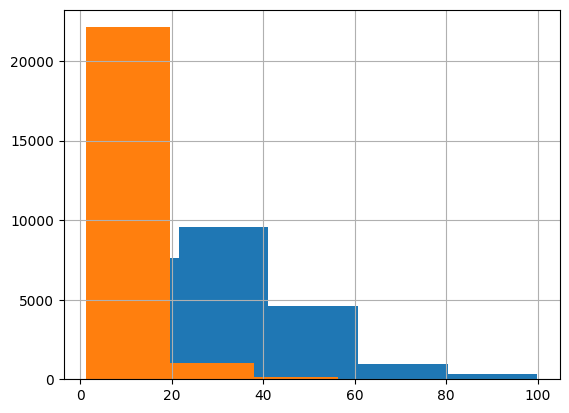

In [15]:
#Заполняем пропуски living_area и kitchen_area медианным значением соотношения жилой/кухонной площади к общей площади, 
#умноженным на общую площадь по каждой группе:

display(data[['total_images', 'last_price', 'house_type_area', 'total_area', 'living_area', 'kitchen_area']].head(30))   

for n in data['house_type_area'].unique():
    data.loc[(data['house_type_area'] == n) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['house_type_area'] == n) & 
             (data['living_area'].isna()), 'living_area_ratio'] * data.loc[(data['house_type_area'] == n) & 
             (data['living_area'].isna()), 'total_area']


for n in data['house_type_area'].unique():
    data.loc[(data['house_type_area'] == n) & (data['kitchen_area'].isna()) & 
             (data['studio'] == False) & (data['open_plan'] == False), 'kitchen_area'] = \
    data.loc[(data['house_type_area'] == n) & (data['kitchen_area'].isna()) & 
             (data['studio'] == False) & 
             (data['open_plan'] == False), 'kitchen_area_ratio'] * data.loc[(data['house_type_area'] == n) & 
             (data['kitchen_area'].isna()) & (data['studio'] == False) & 
             (data['open_plan'] == False), 'total_area']
 
#проверка
data[data['living_area'] < 100]['living_area'].hist(bins=5)
data[data['kitchen_area'] < 100]['kitchen_area'].hist(bins=5)

display(data[['total_images', 'last_price', 'house_type_area', 'total_area', 'living_area', 'kitchen_area']].head(30))   

***Заполнение пропусков в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', \
            'ponds_around3000', 'ponds_nearest'***

In [16]:
display(data[['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', \
            'ponds_around3000', 'ponds_nearest']].isna().sum())

# Видим, что пропуски в столбце parks_nearest объясняются отсутствием парков поблизости (10035 случаев) 
# или пропусками в столбце parks_around3000 (15535-10035 случаев), что также может быть обусловлено тем, что нет парков поблизости, 
# поэтому пропуски в столбце parks_around3000 предлагаю заполнить 0, пропуски в parks_nearest ничем не заполнять:
print()
print(data[data['parks_nearest'].isna()]['parks_around3000'].value_counts())

data['parks_around3000'] = data['parks_around3000'].fillna(0.0).astype('float64')

#аналогично с данными о водоемах: пропуски в столбце ponds_around3000 предлагаю заполнить 0, 
#пропуски в ponds_nearest ничем не заполнять
print(data[data['ponds_nearest'].isna()]['ponds_around3000'].value_counts())

data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0).astype('float64')

# Пропуски в airports_nearest могут объясняться:
# отсутствием аэропорта поблизости или удаленностью ближайшего аэропорта дальше 85 км 
# (максимальное значение в столбце airports_nearest). Предлагаю ничем не заполнять пропуски.

# Пропуски в cityCenters_nearest могут объясняться:
# удаленностью центра города дальше 66 км 
# (максимальное значение в столбце cityCenters_nearest). Предлагаю ничем не заполнять пропуски.



airports_nearest        5524
cityCenters_nearest     5501
parks_around3000        5500
parks_nearest          15535
ponds_around3000        5500
ponds_nearest          14529
dtype: int64


0.0    10035
Name: parks_around3000, dtype: int64
0.0    9029
Name: ponds_around3000, dtype: int64


***Причины, которые могли привести к пропускам в данных***

1. Пользователь не указал данные, т.к. поле может быть необязательным к заполнению.
2. Пользователь указал данные в виде недопустимых символов, которые далее были интерпретированы как пропуски (прочерк вместо 0, латинские символы). Например, кол-во балконов или название населенного пункта.
3. Наличие пропусков в days_exposition может объясняться тем, что на момент выгрузки данных объявление еще было актуально.
4. Автоматическое заполнение системой могло не сработать при удаленности дальше, чем это заложено в поиске, таких полей, как: расстояние/наличие ближайшего аэропорта/центра города, парка, водоема. Либо в геосервисе отсутсвуют данные по выбранному дому, поэтому система не определила ближайшие к дому объекты.
5. Пропуски в kitchen_area объясняются отсутствием отдельного помещения под кухню в студиях.

#### Изменение типов данных

Необходимо изменить тип данных на целочисленный в столбцах: floors_total, balcony, parks_around3000, ponds_around3000, days_exposition и перевести в формат даты столбец first_day_exposition.

Изменения необходимы для более удобного восприятия и последующих арифмитических операций.

In [17]:
print(data.info())

data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']] = \
data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']].astype('int')

#data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce').astype('int')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

float_cols = data.select_dtypes('float').columns

for n in float_cols:
    data[n] = data[n].astype('float32')    

#проверка
print(data.dtypes)
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23352 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price,house_type_area,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5,other_4,0.584842,0.142594
1,7,3350000.0,40.400002,2018-12-04,1,2.60,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,3,other_2,0.516129,0.221491
2,10,5196000.0,56.000000,2015-08-20,2,2.60,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2,other_3,0.594595,0.152510
3,0,64900000.0,159.000000,2015-07-24,3,2.80,14,94.723404,9,False,False,False,18.908108,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,5,other_5,0.595745,0.118919
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,5,other_4,0.584842,0.142594


#### Обработка дубликатов

In [18]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
# приведем к единому написанию слов поселок и посёлок
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# унифицируем названия одинаковых населенных пунктов
data['locality_name'] = data['locality_name'].replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace(['поселок при железнодорожной станции'], 'поселок станции', regex=True)



### Добавьте в таблицу новые столбцы

In [20]:
#цена одного квадратного метра

data['sq_meter_price'] = round(data['last_price'] / data['total_area'], 2)

#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

data['weekday'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления;

data['month'] = data['first_day_exposition'].dt.month

#год публикации объявления;

data['year'] = data['first_day_exposition'].dt.year

#тип этажа квартиры (значения — «‎первый», «последний», «другой»);

def floor_type (row):
    
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floors_total == floor:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

#расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

data['city_center_km'] = round(data['cityCenters_nearest']/1000, 0)

#проверка
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price,house_type_area,living_area_ratio,kitchen_area_ratio,sq_meter_price,weekday,month,year,floor_type,city_center_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,5,other_4,0.584842,0.142594,120370.367188,3,3,2019,другой,16.0
1,7,3350000.0,40.400002,2018-12-04,1,2.60,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,3,other_2,0.516129,0.221491,82920.789062,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.60,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2,other_3,0.594595,0.152510,92785.710938,3,8,2015,другой,14.0
3,0,64900000.0,159.000000,2015-07-24,3,2.80,14,94.723404,9,False,False,False,18.908108,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,5,other_5,0.595745,0.118919,408176.093750,4,7,2015,другой,7.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,5,other_4,0.584842,0.142594,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы

**общая площадь**

20000000.0

763000000.0

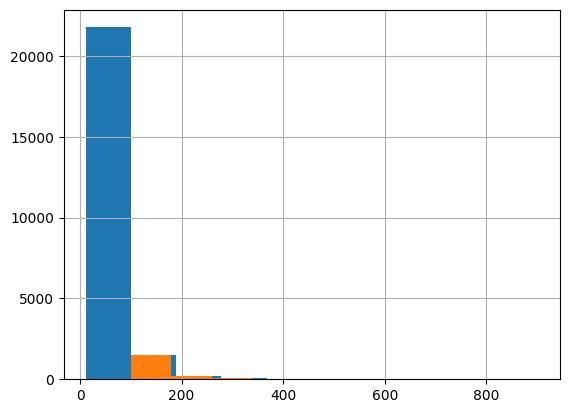

In [21]:
data['total_area'].hist()
#Большинство квартир имеют площадь до 100 м2

data[data['total_area'] > 100]['total_area'].hist()
# еще чуть меньше 2 тыс. квартир имеют площадь от 100 до 400 м2, 
#также встречаются единичные случаи с площадью около 500 м2, 650 м2

data[data['total_area'] > 600]['total_area'].hist()
# и одна квартира площадью 900 м2

#проверим, не являются ли большие значения ошибочными с пропущенной ".", посчитав максимальную и минимальную цену:
display(data[data['total_area'] >= 400]['last_price'].min())
display(data[data['total_area'] >= 400]['last_price'].max())
#минимальная цена - 20 млн., максимальная - 763 млн. Выглядит корректно.


#data[data['total_area'] >= 400][['total_area', 'living_area', 'kitchen_area']]

#data[data['living_area'] * 5 < data['total_area']]

#display(data.query('living_area < 8'))

#display(data.query('living_area + kitchen_area > total_area'))

**жилая площадь**

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price,house_type_area,living_area_ratio,kitchen_area_ratio,sq_meter_price,weekday,month,year,floor_type,city_center_km
3242,7,4440000.0,41.000000,2017-07-02,1,2.60,17,3.000000,17,False,False,False,11.000000,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0,3,other_2,0.516129,0.221491,108292.679688,6,7,2017,последний,13.0
13915,20,6350000.0,52.000000,2018-02-06,2,3.00,6,2.000000,2,False,False,False,9.000000,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0,2,other_3,0.594595,0.152510,122115.382812,1,2,2018,другой,7.0
16431,13,3799000.0,31.000000,2018-04-12,1,2.60,5,6.000000,1,False,False,False,17.000000,0,Санкт-Петербург,32177.0,4826.0,1,430.0,0,NaN,168.0,2,other_2,0.516129,0.221491,122548.390625,3,4,2018,первый,5.0
17582,11,2680000.0,22.000000,2018-08-11,0,2.60,25,5.000000,8,False,True,False,NaN,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,3,studio_1,0.689655,NaN,121818.179688,5,8,2018,другой,12.0
17961,3,1400000.0,13.000000,2017-12-03,1,2.60,9,7.366667,1,False,False,False,2.785714,0,Санкт-Петербург,14350.0,15945.0,0,NaN,1,185.0,410.0,1,other_1,0.566667,0.214286,107692.296875,6,12,2017,первый,16.0
19251,19,4050000.0,33.000000,2018-10-15,1,2.50,22,6.500000,21,False,False,False,18.000000,0,Санкт-Петербург,9258.0,10592.0,1,458.0,0,NaN,44.0,3,other_2,0.516129,0.221491,122727.273438,0,10,2018,другой,11.0
19546,3,1850000.0,13.000000,2019-03-11,1,3.40,5,7.366667,2,False,False,False,2.785714,0,Санкт-Петербург,24915.0,5483.0,1,644.0,0,NaN,24.0,1,other_1,0.566667,0.214286,142307.687500,0,3,2019,другой,5.0
19558,2,1686000.0,13.200000,2018-12-17,1,2.52,5,7.480000,1,False,False,False,2.828571,0,Санкт-Петербург,19891.0,4165.0,1,361.0,1,155.0,19.0,1,other_1,0.566667,0.214286,127727.273438,0,12,2018,первый,4.0
21758,0,2330000.0,23.000000,2018-01-01,0,2.52,24,2.000000,22,False,True,False,NaN,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,66.0,1,studio_1,0.689655,NaN,101304.351562,0,1,2018,другой,NaN
21943,15,6100000.0,77.599998,2019-02-28,4,2.50,9,5.400000,1,False,False,False,9.800000,0,Санкт-Петербург,29338.0,11270.0,1,584.0,0,NaN,33.0,3,other_3,0.594595,0.152510,78608.250000,3,2,2019,первый,11.0


<AxesSubplot:>

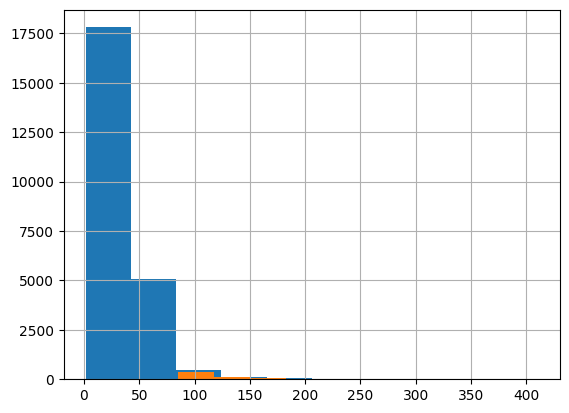

In [22]:
data['living_area'].hist()

# Жилая площадь не может быть менее 8 м2
display(data.query('living_area < 8.0'))
# удалим 11 строк со значением в living_area менее 8
data = data.query('living_area >= 8.0')

#Большинство квартир имеют жилую площадь до 85 м2

data[data['living_area'] > 85]['living_area'].hist()
# чуть менее 700 квартир имеют жилую площадь до 300 м2, 
#также встречаются единичные случаи с жилой площадью более 300 м2

**площадь кухни**

170

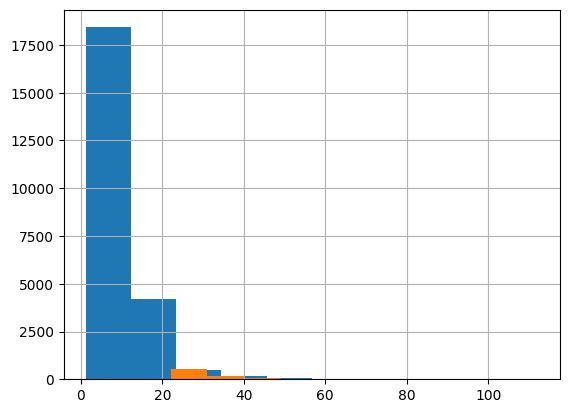

In [23]:
data['kitchen_area'].hist()

# Большинство квартир (около 19 тыс.) имеют кухню площадью до 12 м2.
# Еще у 4 тыс. квартир площадь от 12 м2 до 22 м2.

data[data['kitchen_area'] > 22]['kitchen_area'].hist()
# среди кухонь более 22 м2 встречаются отдельные пики до 57 м2, 
# также встречаются единичные случаи кухонь площадью более 57 м2, максимальное значение площади кухни - 112 м2.


display(data.query('living_area + kitchen_area >= total_area')['house_type_area'].count())
# Сумма жилой площади и кухни не должна быть равной или превышать общую площадь квартиры.  
# удалим 171 строку из датафрейма, где не выполняется это условие:
data = data.query('living_area + kitchen_area < total_area')

**цена объекта**

<AxesSubplot:>

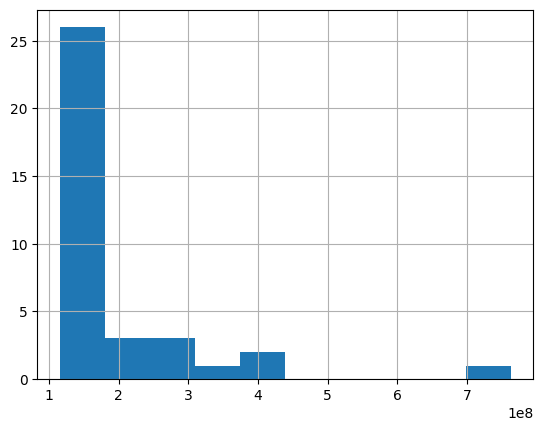

In [24]:
#data['last_price'].hist()
# видим, что большинство квартир имеют цену менее 80 млн руб.

# построим отдельную гистрограмму со стоимостью квартир, равной или менее 80 млн руб.
#data.query('last_price <= 80000000')['last_price'].hist()
# большая часть квартир (18,7 тыс.) имеют цену до 8 млн руб., еще около 3 тыс. имеют цену от 8 млн до 15 млн. руб.,
# около 500 квартир имеют цену от 15 млн до 23 млн руб.,
# квартиры стоимостью выше 23 млн встречаются реже.

# построим гистограмму с самыми дорогими квартирами из датафрейма стоимостью от 100 млн руб.
data.query('last_price >= 100000000')['last_price'].hist()

# самое большое число, 26 квартир, имеют цену от 110 млн до 180 млн руб., среди квартир стоимостью выше 180 млн руб.
# встречаются единичные значения, самую высокую стоимость  - 763 млн руб. имеет одна квартира.



**количество комнат**

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_floor_price,house_type_area,living_area_ratio,kitchen_area_ratio,sq_meter_price,weekday,month,year,floor_type,city_center_km
14498,6,32250000.0,374.600006,2018-06-09,19,3.165,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0,4,other_5,0.595745,0.118919,86091.828125,5,6,2018,другой,4.0


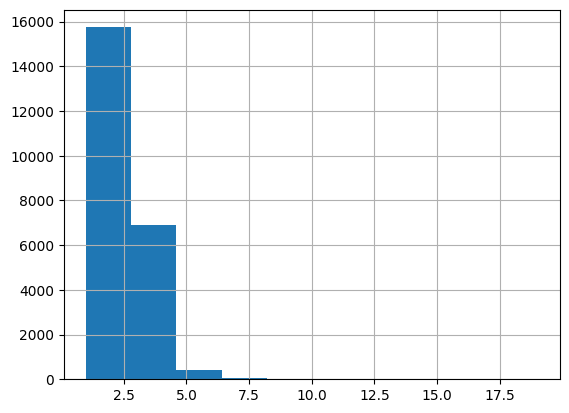

In [25]:
data['rooms'].hist()

# около 15,7 тыс. квартир имеют от 1 до 2 комнат,
# еще около 7 тыс. квартир от 3 до 4 комнат и 500 квартир имеют 5 комнат,
# квартир, имеющих больше 5 комнат, около 190, самое большое число комнат - 19, имеет одна квартира.

data.query(' rooms == 19')

**высота потолков**

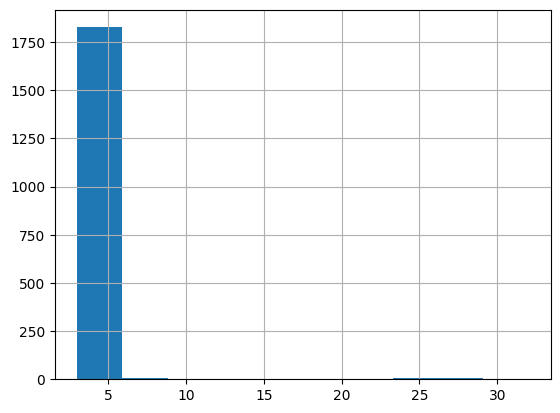

In [26]:
#data['ceiling_height'].hist()

# видим, что в абсолютном большинстве квартир потолки не превышают 3 метров

# построим отдельную гистограмму с потолками выше 3 метров

data.query('ceiling_height > 3')['ceiling_height'].hist()
data.query('3 < ceiling_height <= 5')['ceiling_height'].median()
# около 1,8 тыс. квартир имеют высоту потолков от 3 до 5 метров, с медианой 3,2 метра

# посмотрим отдельно на очень высокие значения от 5 метров:
# data.query('ceiling_height >= 5').sort_values(by = 'ceiling_height')[['last_price', 'total_area', 'ceiling_height', 'locality_name']]

# высота потолков до 6 метров характерна для старинных зданий, оставляем данные без изменений.
# строки с данными высотой потолков от 6 до 10 метров предлагаю удалить (4 строки).
# в значениях с высотой потолков с двумя числами перед точкой вероятно необходимо переместить точку, 
# т.е. скорректировать "10.3" в "1,3", но минимальная высота потолка не может быть ниже 2,2 метров в старом фонде,
# поэтому меняем распооложение точки на одну цифру только для значений выше "22",
# а строки, не соответсвующие этому условию - удаляем,
# также, если таковые существуют, удалим строки с высотой потолков ниже 2.2 метров :

data.loc[data['ceiling_height'] > 22, ['ceiling_height']] = data.query('ceiling_height > 22')['ceiling_height'] / 10
data = data.query('2.2 <= ceiling_height <= 6')

**тип этажа квартиры («первый», «последний», «другой»)**

<AxesSubplot:>

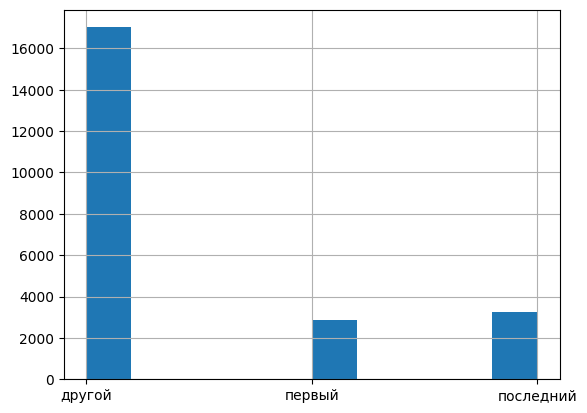

In [27]:
data['floor_type'].hist()
# большая часть квартир, 17 тысяч, находятся не на первом и не на последнем этажах.
# квартир на последнем этаже чуть больше - около 3,2 тысяч против 2,8 тысяч квартир, находящихся на первых этажах.

**общее количество этажей в доме**

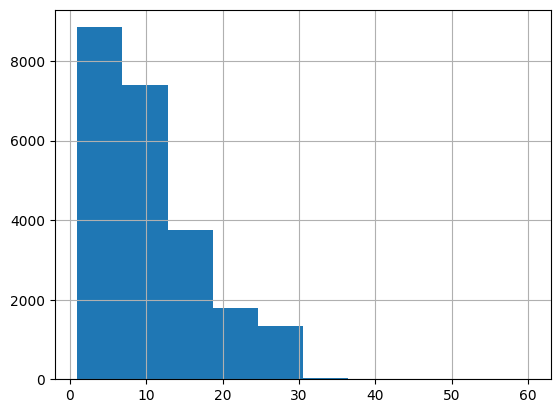

In [28]:
data['floors_total'].hist()

# в датафрейме чаще всего встречаются квартиры в домах до 6 этажа включительно - 8,8 тыс.,
#  следующая крупная выборка - от 7 до 12 этажей - 7,3 тыс.,
# дома с более высокой этажностью встречаются реже, на всю остальную выборку приходится 6,9 тыс. квартир.

# на гистрограмме видно, что есть несколько квартир в домах выше 37 этажа,
# максимальное количество этажей в жилых зданиях в Санкт-Петербурге составляет 37 этажей.
# удалим из датафрейма дома, превышающие это значение:

data = data.query('floors_total <= 37')

**расстояние до центра города в метрах**

30143.0

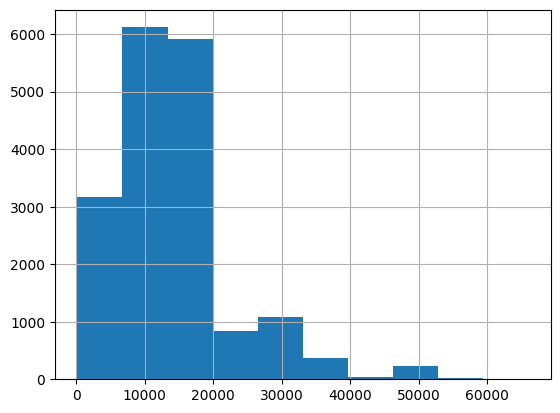

In [29]:
data['cityCenters_nearest'].hist()

# 3,2 тыс. квартир с расстоянием до центра до 7 км.
# 12 тыс. квартир с расстоянием до центра от 7 до 20 км.

# среди оставшихся 2,8 тыс. квартир удаленность от центра распределяется от 20 до 66 км с медианным значением 30 км.

data.query('cityCenters_nearest > 20000')['cityCenters_nearest'].median()

**расстояние до ближайшего парка**

1326.0

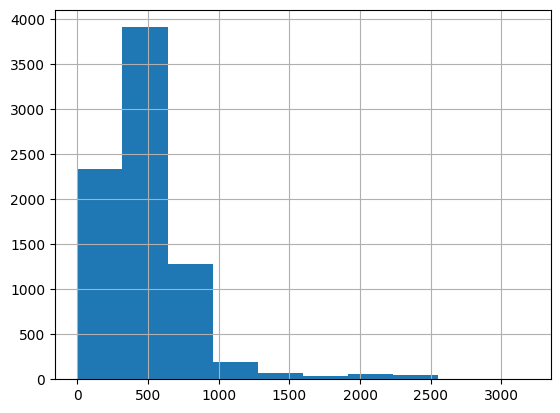

In [30]:
data['parks_nearest'].hist()

# всего квартир с известными данными о расстоянии до ближайшего парка - 7,9 тыс., из них:
# 2,1 тыс. квартир с расстоянием до парка до 300 метров.
# 3,7 тыс. квартир с расстоянием до парка до 600 метров.
# 1,7 тыс. квартир с расстоянием до парка до 950 метров.

# среди оставшихся 400 квартир удаленность от парка распределяется от 950 метров до 3,2 км с медианным значением 1,3 км.

data.query('parks_nearest > 950')['parks_nearest'].median()

*** Вывод ***

Большинство квартир имеют общую площадь до 100 м2.
Чуть менее 2 тыс. квартир имеют площадь от 100 до 400 м2, 
а также встречаются единичные случаи с площадью около 500 м2, 650 м2 и одна квартира площадью 900 м2.
Дополнительно проверили, не являются ли большие значения (от 400 м2 и выше) ошибочными, с пропущенной ".".
Ответ - не являются, большая площадь соответсвует высокой цене или близости к центру.

Большинство квартир имеют жилую площадь до 85 м2.
Чуть менее 700 квартир имеют жилую площадь до 300 м2, также встречаются единичные случаи с жилой площадью более 300 м2.
Были удалены данные о квартирах, где жилая площадь ниже минимальной - 8 м2.

Большинство квартир (около 19 тыс.) имеют кухню площадью до 12 м2.
Еще у 4 тыс. квартир площадь от 12 м2 до 22 м2.
Среди кухонь более 22 м2 встречаются отдельные пики до 57 м2, 
а также встречаются единичные случаи кухонь площадью более 57 м2, максимальное значение площади кухни - 112 м2.
Были удалены строки из датафрейма, где сумма жилой площади и кухни была равной или превышала общую площадь квартиры.

Видим, что большинство квартир имеют цену менее 80 млн руб.
Гистрограмма с условием на стоимость квартир, равной или менее 80 млн руб. показала, 
- что большая часть квартир (18,7 тыс.) имеют цену до 8 млн руб., 
- еще около 3 тыс. имеют цену от 8 млн до 15 млн. руб.,
- около 500 квартир имеют цену от 15 млн до 23 млн руб.
Квартиры стоимостью выше 23 млн встречаются реже.
Гистрограмма с условием на самые дорогие квартиры от 100 млн руб. из датафрейма показала, 
- что самое большое число, 26 квартир, имеют цену от 110 млн до 180 млн руб., 
- среди квартир стоимостью выше 180 млн руб. встречаются единичные значения, 
- самую высокую стоимость  - 763 млн руб. имеет одна квартира.

Около 15,7 тыс. квартир имеют от 1 до 2 комнат,
еще около 7 тыс. квартир от 3 до 4 комнат и 500 квартир имеют 5 комнат,
квартир, имеющих больше 5 комнат, около 190, самое большое число комнат - 19, имеет одна квартира.

Видим, что в абсолютном большинстве квартир потолки не превышают 3 метров.
Около 1,8 тыс. квартир имеют высоту потолков от 3 до 5 метров, с медианой 3,2 метра.
Также встречаются единичные значения потолков свыше 5 метров. Высота потолков до 6 метров характерна для старинных зданий, оставляем данные без изменений.
Скорректировали расположение точки на один знак для некорректно указанных значений выше 22 метров, превратив в 2.2 метра.
Строки с неправдоподобной высотой потолков выше 6 метров или ниже 2,2 метров были удалены.

Всего квартир с известными данными о расстоянии до ближайшего парка - 17,8 тыс., из них:
- 3,2 тыс. квартир с расстоянием до центра до 7 км.
- 12 тыс. квартир с расстоянием до центра от 7 до 20 км.
Cреди оставшихся 2,8 тыс. квартир удаленность от центра распределяется от 20 до 66 км с медианным значением 30 км.

Всего квартир с известными данными о расстоянии до ближайшего парка - 7,9 тыс., из них:
- 2,1 тыс. квартир с расстоянием до парка до 300 метров.
- 3,7 тыс. квартир с расстоянием до парка до 600 метров.
- 1,7 тыс. квартир с расстоянием до парка до 950 метров.
Cреди оставшихся 400 квартир удаленность от парка распределяется от 950 метров до 3,2 км с медианным значением 1,3 км.

#### Изучите, как быстро продавались квартиры.

181.74077
96.0


55.0

62.44886

324.0

401.972

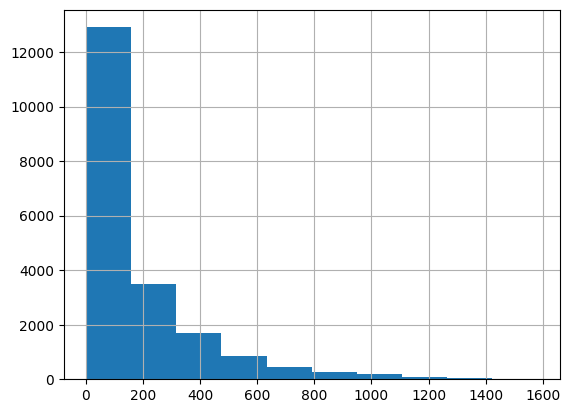

In [31]:
data['days_exposition'].hist()
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

display(data.query('days_exposition <= 160')['days_exposition'].median())
display(data.query('days_exposition <= 160')['days_exposition'].mean())
display(data.query('days_exposition > 160')['days_exposition'].median())
display(data.query('days_exposition > 160')['days_exposition'].mean())

<AxesSubplot:>

,days_exposition,adv_count
44,45.0,854
59,60.0,529
6,7.0,222
29,30.0,202
89,90.0,196
3,4.0,170
2,3.0,153
4,5.0,145
13,14.0,143
8,9.0,140


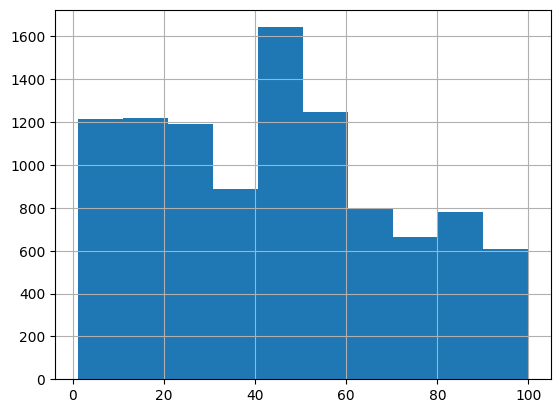

In [32]:
display(data.query('days_exposition <= 100')['days_exposition'].hist())

display( data.groupby('days_exposition').agg(
    adv_count=('locality_name', 'count') 
).reset_index().sort_values(by='adv_count', ascending=False).head(10))

*** Вывод ***

Среднее арифмитическое длительности продажи квартрир - 186 дней против медианного значения 110 дней.
Значительное превышение среднего над медианным на 69 % означает, что в выборке присутствуют выбросы: 
некоторое количество квартир продавались очень долго.
Обычно продажа занимает 110 дней.

На гистрограмме видим, что 13 тыс. квартир, составляющее 65 % от общей выборки в 20 тыс. квартир, продаются от 1 до 160 дней.
Находим отдельно для этой выборки медиану 66 дней и среднее, стремящееся к медиане - 68 дней.
Делаем вывод, что данная выборка достаточно однородна, без значительных выбросов.
Таким образом, количество дней продажи квартиры, не превышающее или равное 65 дням, можно считать быстрой продажей.

Рассмотрим оставшиеся 7 тыс. квартир, что составляют 35 % выборки.
Здесь медина равна 324 дням, среднее - 402 дням. Среднее превышает медиану на 24 %, поэтому можно сделать вывод
о наличии выбросов, однако в меньшем количестве для этой выборки, чем для первой из 65 % общей выборки.
Таким образом, количество дней продажи квартиры, превышающее 324 дня, можно считать достаточно долгой продажей.

#### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.

In [33]:
data_new = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]

In [34]:
print(data['last_price'].corr(data['total_area']))    
print(data['last_price'].corr(data['living_area']))    
print(data['last_price'].corr(data['kitchen_area']))    
print(data['last_price'].corr(data['rooms']))    

0.6531569191506216
0.5843388662206093
0.4955526950442191
0.36288479474003293


              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.653157     0.584339      0.495553  0.362885
total_area      0.653157    1.000000     0.948456      0.635948  0.760083
living_area     0.584339    0.948456     1.000000      0.472225  0.833390
kitchen_area    0.495553    0.635948     0.472225      1.000000  0.298005
rooms           0.362885    0.760083     0.833390      0.298005  1.000000


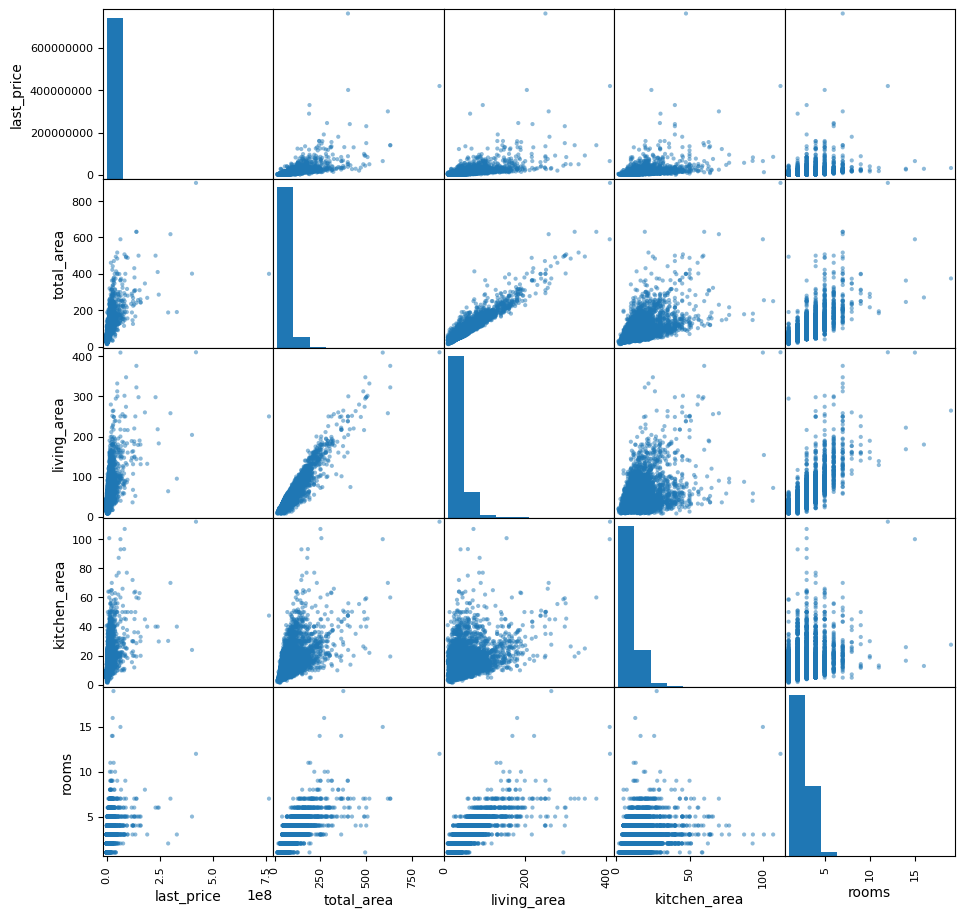

In [35]:
print(data_new.corr())
pd.plotting.scatter_matrix(data_new, figsize=(11, 11));

,floor_type,average_price,adv_count
0,другой,5650000.0,11971
1,первый,4899500.0,1568
2,последний,5650000.0,1870


<AxesSubplot:xlabel='floor_type'>

,floor_type,average_price,adv_count
0,другой,3352500.0,5046
1,первый,2765000.0,1288
2,последний,2890000.0,1407


<AxesSubplot:xlabel='floor_type'>

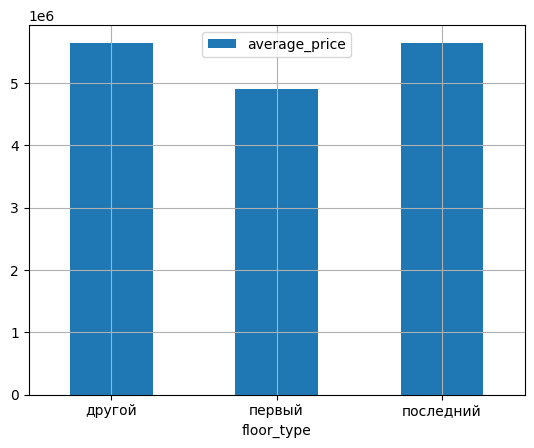

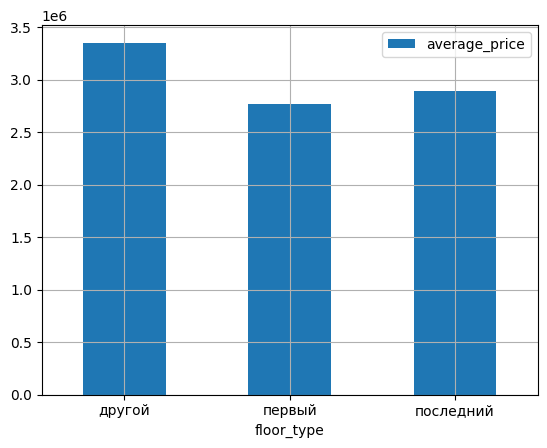

In [36]:
# Сводная таблица и график со средней ценой квартир в разрезе типа этажа.

pivot_table = data[data['locality_name'] == 'Санкт-Петербург'].groupby('floor_type').agg(
    average_price=('last_price', 'median'),
    adv_count=('locality_name', 'count') 
).reset_index()

display(pivot_table)
display(pivot_table.plot.bar(x='floor_type', y='average_price', rot=0, grid=True))

pivot_table = data[data['locality_name'] != 'Санкт-Петербург'].groupby('floor_type').agg(
    average_price=('last_price', 'median'),
    adv_count=('locality_name', 'count') 
).reset_index()

display(pivot_table)
display(pivot_table.plot.bar(x='floor_type', y='average_price', rot=0, grid=True))

,weekday,average_price,adv_count
0,0,4650000.0,3537
1,1,4750000.0,4085
2,2,4700000.0,3885
3,3,4690000.0,4201
4,4,4600000.0,3906
5,5,4600000.0,1886
6,6,4550000.0,1650


<AxesSubplot:xlabel='weekday'>

<AxesSubplot:xlabel='weekday'>

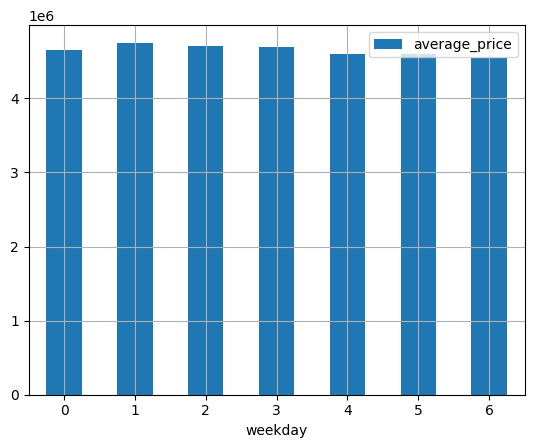

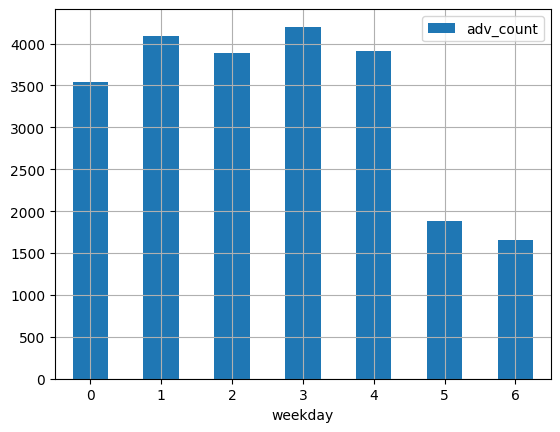

In [37]:
# Сводная таблица и график со средней ценой квартир в разрезе дня недели.

pivot_table = data.groupby('weekday').agg(
    average_price=('last_price', 'median'),
    adv_count=('locality_name', 'count') 
).reset_index()

display(pivot_table)
display(pivot_table.plot.bar(x='weekday', y='average_price', rot=0, grid=True))
display(pivot_table.plot.bar(x='weekday', y='adv_count', rot=0, grid=True))

,month,average_price,adv_count
0,1,4600000.0,1466
1,2,4650000.0,2597
2,3,4700000.0,2533
3,4,4800000.0,2319
4,5,4550000.0,1231
5,6,4400000.0,1727
6,7,4650000.0,1649
7,8,4600000.0,1706
8,9,4740000.0,1935
9,10,4600000.0,2070


<AxesSubplot:xlabel='month'>

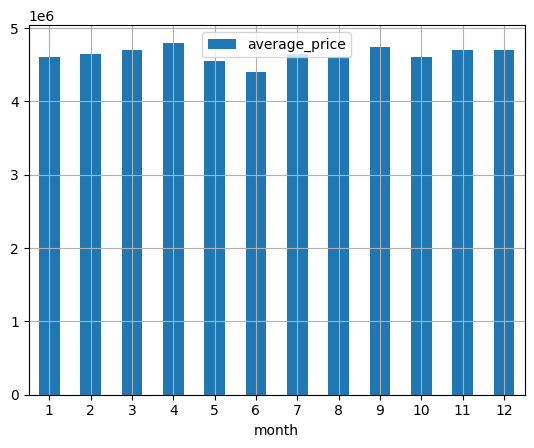

In [38]:
# Сводная таблица и график со средней ценой квартир в разрезе месяца.

pivot_table = data.groupby('month').agg(
    average_price=('last_price', 'median'),
    adv_count=('locality_name', 'count') 
).reset_index()

display(pivot_table)
display(pivot_table.plot.bar(x='month', y='average_price', rot=0, grid=True))

,year,average_price,adv_count
0,2014,8037000.0,131
1,2015,5301000.0,1153
2,2016,4550000.0,2707
3,2017,4500000.0,8004
4,2018,4600000.0,8328
5,2019,5100000.0,2827


<AxesSubplot:xlabel='year'>

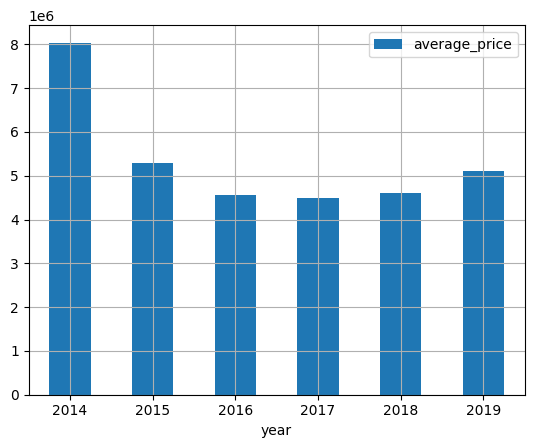

In [39]:
# Сводная таблица и график со средней ценой квартир в разрезе года.

pivot_table = data.groupby('year').agg(
    average_price=('last_price', 'median'),
    adv_count=('locality_name', 'count') 
).reset_index()

display(pivot_table)
display(pivot_table.plot.bar(x='year', y='average_price', rot=0, grid=True))

*** Вывод ***

Из матрицы корреляции и диаграмм рассеяния видим, что на стоимость объекта больше остальных факторов влияет общая площадь квартиры, коэффициент корреляции - 0,65. Следовательно связанные с общей площадью параметры жилой и кухонной площади также оказывают влияние с коэффициентами корреляции 0,58 и 0,5 соответственно: чем больше площадь, тем выше цена объекта. 
Также небольшая корреляция цены наблюдается от количества комнат в квартире.

В среднем цена квартиры, расположенной на первом этаже ниже, чем на остальных этажах. Больше всего разница заметна в Санкт-Петербурге, где средняя цена объекта, расположенного на первом этаже, ниже на 15 % в сравнении с этажами выше первого.

В выходные размещается в 2 раза меньше объявлений по сравнению с серединой недели.

С 2016 по 2018 годы средняя цена квартир практически не менялась год к году. В 2019 виден рост средней цены на 11 % к 2018 году, повышение цен может быть обусловлено увеличением спроса в связи со снижением ипотечной ставки в 2019 году.

Изменчивость цены от дня недели или месяца размещения объявления не замечена.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

,locality_name,average_price,adv_count
33,Санкт-Петербург,104545.453125,15409
32,Пушкин,100000.000000,368
230,поселок Парголово,91642.859375,321
79,деревня Кудрово,91569.773438,277
219,поселок Мурино,84192.734375,518
294,поселок Шушары,76666.656250,434
13,Колпино,74729.187500,336
6,Гатчина,67647.062500,303
3,Всеволожск,65789.476562,383
4,Выборг,58417.019531,232


<AxesSubplot:xlabel='locality_name'>

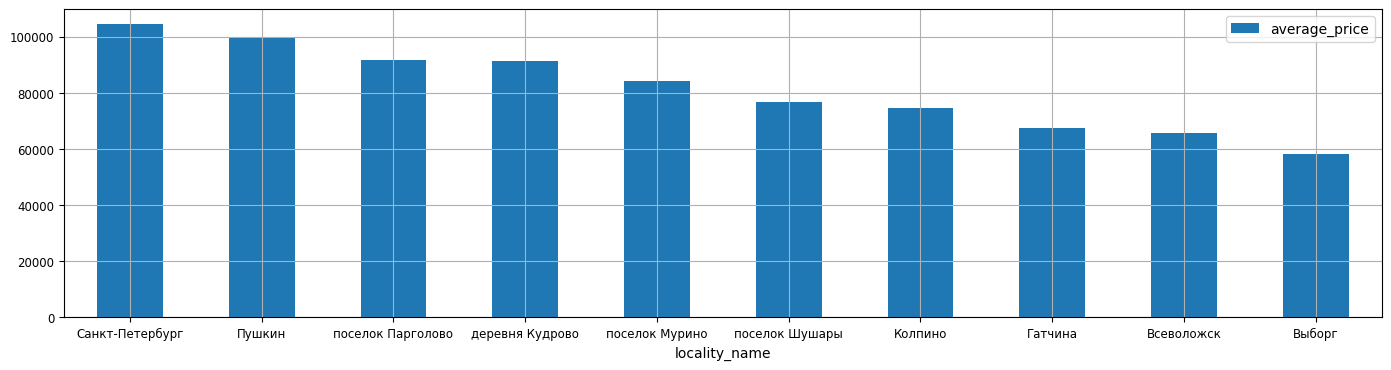

In [40]:
pivot_table = data.groupby('locality_name').agg(
    average_price=('sq_meter_price', 'median'),
    adv_count=('locality_name', 'count')
).reset_index()

pivot_table = pivot_table.sort_values(by='adv_count', ascending = False).head(10)

display(pivot_table.sort_values(by='average_price', ascending = False))

display(pivot_table
        .sort_values(by='average_price', ascending = False)
        .plot.bar(x='locality_name', y='average_price', rot=0, grid=True, figsize=(17, 4), fontsize=8.5))

*** Вывод ***

Среди десяти населенных пунктов с самым большим количеством объявлений, самая высокая средняя цена за 1 м2 в Санкт-Петербурге - 104,5 тыс. рублей, самая низкая цена - в Выборге - 58,4 тыс. рублей.

#### Выделите квартиры в Санкт-Петербурге и вычислите их среднюю стоимость на разном удалении от центра.

In [41]:
pivot_table = data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_center_km').agg(
    average_price=('last_price', 'median'),
    adv_count=('locality_name', 'count')
).reset_index()

display(pivot_table)

,city_center_km,average_price,adv_count
0,0.0,13900000.0,25
1,1.0,11490000.0,190
2,2.0,10300000.0,305
3,3.0,8420000.0,343
4,4.0,9300000.0,683
5,5.0,9490000.0,896
6,6.0,8900000.0,608
7,7.0,7801500.0,414
8,8.0,7420000.0,584
9,9.0,5350500.0,584


<AxesSubplot:xlabel='city_center_km', ylabel='average_price'>

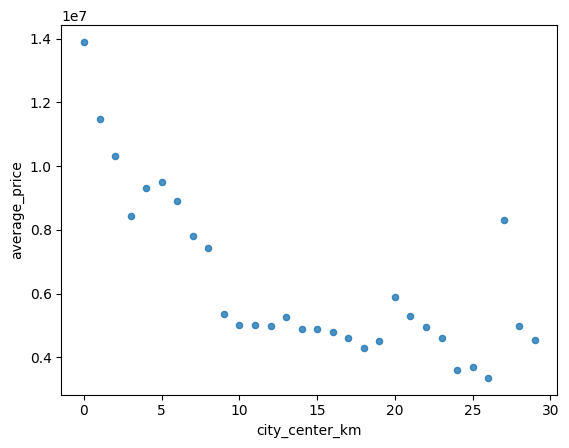

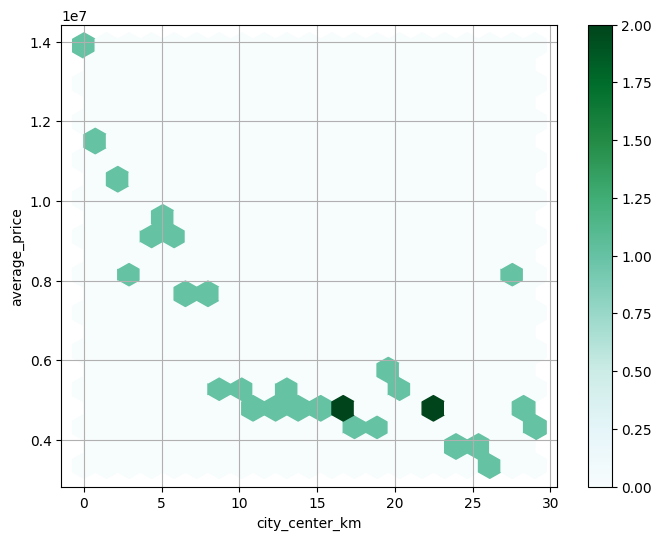

In [42]:
pivot_table.plot(x='city_center_km', y='average_price', kind='scatter', alpha=0.8) 
pivot_table.plot(x='city_center_km', y='average_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [43]:
# добавим в сводную таблицу средние значения расстояния до ближайшего парка, пруда, общей площади и количества комнат.

data['parks_nearest_km'] = round(data['parks_nearest']/1000, 1)
data['ponds_nearest_km'] = round(data['ponds_nearest']/1000, 1)


pivot_table = data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_center_km').agg(
    average_price=('last_price', 'median'),
    adv_count=('locality_name', 'count'),
    average_parks=('parks_nearest_km', 'median'),
    average_ponds=('ponds_nearest_km', 'median'),
    average_square=('total_area', 'median'),
    average_rooms=('rooms', 'median'),   
).reset_index()

display(pivot_table)

,city_center_km,average_price,adv_count,average_parks,average_ponds,average_square,average_rooms
0,0.0,13900000.0,25,0.3,0.50,106.000000,3.0
1,1.0,11490000.0,190,0.4,0.10,87.300003,3.0
2,2.0,10300000.0,305,0.4,0.30,89.300003,3.0
3,3.0,8420000.0,343,0.4,0.50,80.000000,3.0
4,4.0,9300000.0,683,0.5,0.50,81.000000,3.0
5,5.0,9490000.0,896,0.4,0.50,80.000000,3.0
6,6.0,8900000.0,608,0.4,0.50,72.000000,2.0
7,7.0,7801500.0,414,0.4,0.50,69.550003,2.0
8,8.0,7420000.0,584,0.5,0.40,63.000000,2.0
9,9.0,5350500.0,584,0.5,0.50,53.000000,2.0


*** Вывод ***

Из данных графиков и сводной таблицы видим общую тенденцию, чем ближе к центру города расположен объект, тем выше цена.
И также, чем отдаленнее квартира от центра, тем ниже ее цена. 

Однако, есть некоторые исключения из общей картины. 
Например, при удаленности от центра в 27 км, средняя цена составляет 8,3 млн рублей, что превышает более чем в 2 раза цену объектов с удаленностью 24-26 км. Высокую цену в данном случае можно объяснить нерепрезентативностью выборки: всего 2 квартиры находятся в данной группе, и их высокая цена может объсняться множеством других факторов, например, высокой категорией жилья.

Также видим, что средняя цена квартир при удаленности от центра в 20 и 21 км (5,9 и 5,3 млн соответсвенно) превышает цену объектов при гораздо меньшей удаленности. Один из факторов, который мог повлиять на высокую цену квартир в данной группе, несмотря на то, что данные районы  и находятся дальше от центра города, это большая общая площадь квартир. Так, средняя общая прощадь объектов при удаленности от центра в пределах 14-19 км не превышает 50 м2, в то время как при удаленности в 20 км средняя площадь составляет 63 м2, при удаленности в 21 км - 55 м2. Также нужно учесть дополнительный фактор- в группе с расстоянием в 20 км от центра среднее растояние до ближайшего пруда составляет всего 100 метров - ближе, чем в группах с меньшей близостью к центру. 

### Напишите общий вывод

В среднем продажа квартиры составляет 110 дней. 
Быстрой продажей можно считать ту, что не превышает 65 дней, медленную - дольше 324 дней.
Нужно учесть, что на расчетные значения повлиял тот факт, что часть объявлений были сняты с публикации в связи с истечением срока действия, а не в связи с продажей объекта.

Среди десяти населенных пунктов с самым большим количеством объявлений, самая высокая средняя цена за 1 м2 в Санкт-Петербурге - 104,5 тыс. рублей, самая низкая цена - в Выборге - 58,4 тыс. рублей.

На стоимость объекта влияет общая площадь квартиры и связанные с ней параметры жилой, кухонной площади и количества комнат в квартире.
Квартиры, расположенные на первых этажах в среднем стоят дешевле, наиболее заметна разница в Санкт-Петербурге, где средняя цена объекта, расположенного на первом этаже, ниже на 15 % в сравнении с этажами выше первого.

Вместе с площадью на цену квартир в Санкт-Петербурге также влияет удаленность от центра города: чем ближе к центру города расположен объект, тем выше цена, и наоборот - чем отдаленнее квартира от центра, тем ниже ее цена. 

Таким образом на цену влияет совокупность факторов: общая площадь квартиры, удаленность объекта от центра города, первый этаж менее предпочтителен.

В выходные дни размещается в 2 раза меньше объявлений по сравнению с серединой недели.

В 2019 наблюдался рост средней цены на 11 % к 2018 году, повышение цен могло быть обусловлено увеличением спроса в связи со снижением ипотечной ставки в 2019 году.

Зависимости цены от дня недели или месяца размещения объявления не обнаружено.